# Instruction to set up a baseline CNN to train an image classifier

In this tutorial, I will show you how to train a simple CNN on the beauty image subset. Here are what you need:
- `keras` installed, with GPU.
-  enough space to extract the dataset; ideally, it should be at least 90GB. FYI, the format `.tar.gz`, as in `beauty_image.tar.gz`, is in fact a file name extension indicating this is a compressed file, similar to `.zip`.  I used Hamster Zip Archiver software (Windows) to extract, even though it is easier to do so in Linux, i.e. type in the terminal
```sh
tar -zxvf yourfile.tar.gz
```

You can then set up a simple CNN as following steps:
1. Reorganize directory tree
2. Train a CNN for beauty images.

> **NOTE**: ignore the warning error here and run it on your local machine. 


# 1. Reorganize directory tree

You should have directory tree with following structure:
```
NDSC_project    
|-- train.csv
|-- test.csv
|-- this_jupyter_notebook.ipynb
|-- categories.json
|-- beauty_image
|   |-- 000004d60c92af4390399d71a305f64b.jpg
|   |-- 0000113904d1bc15232ee3b8a5432254.jpg
|   |-- ...
|-- fashion_image
|   |-- 000006831bfaf0e3b5ce3564a10e6dd4.jpg
|   |-- 6819bac64db6f99d6dc37a897c0e9651.jpg
|   |-- ...
|-- mobile_image
|   |-- 0000456f97a4805ba4960084ffc8c058.jpg
|   |-- 454bdaf9438c099583957964914ffbe5.jpg
|   |-- ...
```

In [2]:
%matplotlib inline

import pandas as pd
import os
import sys

# check the current directory
cwd = os.getcwd()
print ('Current directory: {}'.format(cwd))

# create new directories
new_folder_paths = ['Train',
                    os.path.join('Train','Beauty'),
                    os.path.join('Train','Fashion'),
                    os.path.join('Train','Mobile'),
                    'Test',
                    os.path.join('Test','Beauty'),
                    os.path.join('Test','Fashion'),
                    os.path.join('Test','Mobile')]

for folder_path in new_folder_paths:
    if (os.path.isdir(folder_path) is False):
        os.mkdir(folder_path)

'''
We now reorganize image files in training set
'''

train_data = pd.read_csv('train.csv')
n_labels = 58
folder_path_dict = {i:'Beauty' for i in range(17)}
folder_path_dict.update({i:'Fashion' for i in range(17, 31, 1)})
folder_path_dict.update({i:'Mobile' for i in range(31, 58, 1)})


for category in range(n_labels):
        
    category_img_paths = train_data[train_data['Category']==category]['image_path'].values.tolist()
    folder_path = os.path.join('Train', folder_path_dict[category], str(category))

    if (os.path.isdir(folder_path) is False):
        os.mkdir(folder_path)

    for img_path in category_img_paths:
        img_name = img_path.split('/')[1]
        
        # some image paths does not contain file extension
        if (img_name[-4:] != '.jpg'):
            img_name += '.jpg'
            img_path += '.jpg'
            
        # if there is no image found, just pass and we will have a look later on
        try:
            os.rename(img_path, os.path.join(folder_path, img_name))
        except FileNotFoundError:
            pass

test_data = pd.read_csv('test.csv')
category_img_paths = test_data['image_path'].values.tolist()
for img_path in category_img_paths:
    img_master_label, img_name = img_path.split('/')
    
    if (img_master_label == 'beauty_image'):
        folder_path = os.path.join('Test', 'Beauty')
    elif (img_master_label == 'fashion_image'):
        folder_path = os.path.join('Test', 'Fashion')
    else:
        folder_path = os.path.join('Test', 'Mobile')
        
    if (img_name[-4:] != '.jpg'):
            img_name += '.jpg'
            img_path += '.jpg'
      
    try:
        os.rename(img_path, os.path.join(folder_path, img_name))
    except FileNotFoundError:
        pass

Current directory: /Users/pengyu/Projects/ndsc


It may take up to 40 minutes to finish copying files. The goal of the script is to re-organize the whole image dataset in such a way that it is easy to load and train. You can find 2 news folders:
```
NDSC_project    
|-- Train
|   |-- Beauty
|   |   |-- 0
|   |   |-- 1 
|   |   |-- ...
|   |-- Fashion
|   |   |-- 17
|   |   |-- 18 
|   |   |-- ...
|   |-- Mobile
|   |   |-- 31
|   |   |-- 32
|   |   |-- ...
|-- Test
|   |-- Beauty
|   |-- Fashion
|   |-- Mobile
```

# 2. Train a CNN for beauty images.

In [6]:
import json

with open('categories.json') as json_file:
    labels = json.load(json_file)
numerical2label = {}

for master_label in labels.keys():
    master_dict = labels[master_label]
    for item_name, item_idx in master_dict.items():
        numerical2label[item_idx] = item_name
        
label2numerical = {}
for item_idx, item_name in numerical2label.items():
    label2numerical[item_name] = item_idx

In [7]:
# Source: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
import os, shutil


# Directories for our training,
# validation and test splits
base_dir = os.path.join(os.getcwd(), 'Train', 'Beauty')
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    pass
validation_dir = os.path.join(base_dir, 'validate')
try:
    os.mkdir(validation_dir)
except:
    pass
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    pass

# Directory with our training categories
n_labels = 17
for category_id in range(n_labels):
    category_name = numerical2label[category_id]
    train_category_dir = os.path.join(train_dir, category_name)
    if (os.path.isdir(train_category_dir) is False):
        os.mkdir(train_category_dir)

# Directory with our validation categories
for category_id in range(n_labels):
    category_name = numerical2label[category_id]
    validation_category_dir = os.path.join(validation_dir, category_name)
    if (os.path.isdir(validation_category_dir) is False):
        os.mkdir(validation_category_dir)

# Directory with our test categories
for category_id in range(n_labels):
    category_name = numerical2label[category_id]
    test_category_dir = os.path.join(test_dir, category_name)
    if (os.path.isdir(test_category_dir) is False):
        os.mkdir(test_category_dir)

In [8]:
for category in range(n_labels):
    print('Category {0}|{1} \t has {2} images.'.format(numerical2label[category],
                                                    category,
                                                    len(os.listdir(os.path.join(base_dir, str(category))))))

Category Face Palette|0 	 has 3772 images.
Category Foundation|1 	 has 28670 images.
Category Blush On|2 	 has 11544 images.
Category Powder|3 	 has 81250 images.
Category Other Face Cosmetics|4 	 has 42688 images.
Category BB & CC Cream|5 	 has 55279 images.
Category Contour|6 	 has 2047 images.
Category Concealer|7 	 has 11668 images.
Category Highlighter|8 	 has 6048 images.
Category Primer|9 	 has 8106 images.
Category Setting Spray|10 	 has 1077 images.
Category Bronzer|11 	 has 4108 images.
Category Lipstick|12 	 has 21782 images.
Category Lip Tint|13 	 has 2982 images.
Category Lip Gloss|14 	 has 2735 images.
Category Lip Liner|15 	 has 599 images.
Category Other Lip Cosmetics|16 	 has 2228 images.


In [9]:
train_ratio = 0.7; validation_ratio = 0.1; test_ratio = 0.2

for category in range(n_labels):
    category_size = len(os.listdir(os.path.join(base_dir, str(category))))
    train_size = int(train_ratio * category_size)
    validation_size = int(validation_ratio * category_size)
    test_size = category_size - (train_size + validation_size)
    
    # Copy data from category_dir to create train set for category
    category_dir = os.path.join(base_dir, str(category))
    train_category_dir = os.path.join(train_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[0:train_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(train_category_dir, fname)
        shutil.copyfile(src, dst)
        
    # Copy data from category_dir to create validation set for category
    validation_category_dir = os.path.join(validation_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size:train_size+validation_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(validation_category_dir, fname)
        shutil.copyfile(src, dst)

    # Copy data from category_dir to create test set for category
    test_category_dir = os.path.join(test_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size+validation_size:]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(test_category_dir, fname)
        shutil.copyfile(src, dst)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 200600 images belonging to 17 classes.
Found 28649 images belonging to 17 classes.


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(),
              metrics=['acc'])

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 102s 1s/step - loss: 2.2143 - acc: 0.2695 - val_loss: 2.1911 - val_acc: 0.2750
Epoch 2/30
100/100 [==============================] - 94s 938ms/step - loss: 2.1801 - acc: 0.2760 - val_loss: 2.2079 - val_acc: 0.2750
Epoch 3/30
100/100 [==============================] - 95s 946ms/step - loss: 2.1360 - acc: 0.2760 - val_loss: 2.0805 - val_acc: 0.2840
Epoch 4/30
100/100 [==============================] - 94s 937ms/step - loss: 2.0998 - acc: 0.2790 - val_loss: 2.0154 - val_acc: 0.3220
Epoch 5/30
100/100 [==============================] - 93s 927ms/step - loss: 2.0117 - acc: 0.3095 - val_loss: 2.1052 - val_acc: 0.2810
Epoch 6/30
100/100 [==============================] - 94s 938ms/step - loss: 2.0652 - acc: 0.2895 - val_loss: 2.0748 - val_acc: 0.3110
Epoch 7/30
100/100 [==============================] - 93s 935ms/step - loss: 2.0337 - acc: 0.3125 - val_loss: 2.0413 - val_acc: 0.3150
Epoch 8/3

In [15]:
model.save('cnn_baseline_beauty.h5')

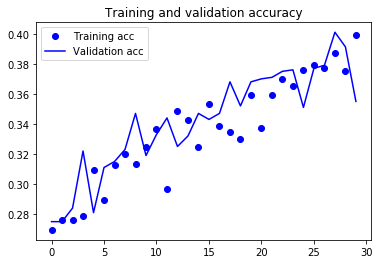

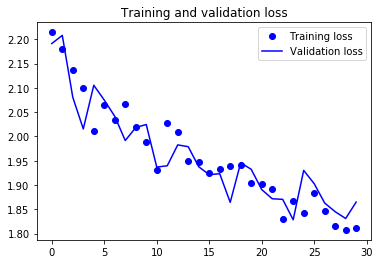

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 57334 images belonging to 17 classes.
test acc: 0.3670000011473894


In [18]:
# Source: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
import os, shutil


# Directories for our training,
# validation and test splits
base_dir = os.path.join(os.getcwd(), 'Train', 'Fashion')
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    pass
validation_dir = os.path.join(base_dir, 'validate')
try:
    os.mkdir(validation_dir)
except:
    pass
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    pass

# Directory with our training categories
n_labels = 14
for category_id in range(17, 17+n_labels):
    category_name = numerical2label[category_id]
    train_category_dir = os.path.join(train_dir, category_name)
    if (os.path.isdir(train_category_dir) is False):
        os.mkdir(train_category_dir)

# Directory with our validation categories
for category_id in range(17, 17+n_labels):
    category_name = numerical2label[category_id]
    validation_category_dir = os.path.join(validation_dir, category_name)
    if (os.path.isdir(validation_category_dir) is False):
        os.mkdir(validation_category_dir)

# Directory with our test categories
for category_id in range(17, 17+n_labels):
    category_name = numerical2label[category_id]
    test_category_dir = os.path.join(test_dir, category_name)
    if (os.path.isdir(test_category_dir) is False):
        os.mkdir(test_category_dir)

In [19]:
for category in range(17,17+n_labels):
    print('Category {0}|{1} \t has {2} images.'.format(numerical2label[category],
                                                    category,
                                                    len(os.listdir(os.path.join(base_dir, str(category))))))

Category Others|17 	 has 2765 images.
Category Casual Dress|18 	 has 56598 images.
Category Party Dress|19 	 has 13493 images.
Category Maxi Dress|20 	 has 19978 images.
Category A Line Dress|21 	 has 10483 images.
Category Bodycon Dress|22 	 has 15225 images.
Category Wedding Dress|23 	 has 1671 images.
Category Big Size Dress|24 	 has 4251 images.
Category Tshirt|25 	 has 33922 images.
Category Blouse |26 	 has 33845 images.
Category Shirt|27 	 has 16199 images.
Category Tanktop|28 	 has 6493 images.
Category Crop Top |29 	 has 3338 images.
Category Big Size Top|30 	 has 1441 images.


In [20]:
train_ratio = 0.7; validation_ratio = 0.1; test_ratio = 0.2

for category in range(17, 17+n_labels):
    category_size = len(os.listdir(os.path.join(base_dir, str(category))))
    train_size = int(train_ratio * category_size)
    validation_size = int(validation_ratio * category_size)
    test_size = category_size - (train_size + validation_size)
    
    # Copy data from category_dir to create train set for category
    category_dir = os.path.join(base_dir, str(category))
    train_category_dir = os.path.join(train_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[0:train_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(train_category_dir, fname)
        shutil.copyfile(src, dst)
        
    # Copy data from category_dir to create validation set for category
    validation_category_dir = os.path.join(validation_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size:train_size+validation_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(validation_category_dir, fname)
        shutil.copyfile(src, dst)

    # Copy data from category_dir to create test set for category
    test_category_dir = os.path.join(test_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size+validation_size:]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(test_category_dir, fname)
        shutil.copyfile(src, dst)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 153785 images belonging to 14 classes.
Found 21964 images belonging to 14 classes.


In [26]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [28]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(),
              metrics=['acc'])

In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 102s 1s/step - loss: 2.2483 - acc: 0.2375 - val_loss: 2.2518 - val_acc: 0.2560
Epoch 2/30
100/100 [==============================] - 94s 938ms/step - loss: 2.2108 - acc: 0.2400 - val_loss: 2.2095 - val_acc: 0.2430
Epoch 3/30
100/100 [==============================] - 93s 931ms/step - loss: 2.2333 - acc: 0.2440 - val_loss: 2.1856 - val_acc: 0.2970
Epoch 4/30
100/100 [==============================] - 94s 936ms/step - loss: 2.2573 - acc: 0.2490 - val_loss: 2.1916 - val_acc: 0.2850
Epoch 5/30
100/100 [==============================] - 93s 934ms/step - loss: 2.1721 - acc: 0.2695 - val_loss: 2.2462 - val_acc: 0.2390
Epoch 6/30
100/100 [==============================] - 94s 937ms/step - loss: 2.2144 - acc: 0.2545 - val_loss: 2.1592 - val_acc: 0.2660
Epoch 7/30
100/100 [==============================] - 93s 933ms/step - loss: 2.2277 - acc: 0.2615 - val_loss: 2.2311 - val_acc: 0.2550
Epoch 8/30
100/100 [==============================] - 94s

In [30]:
model.save('cnn_baseline_fashion.h5')

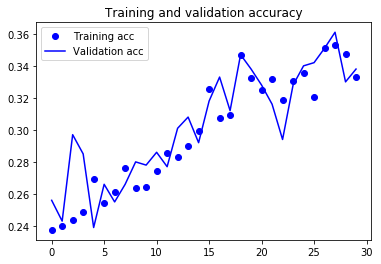

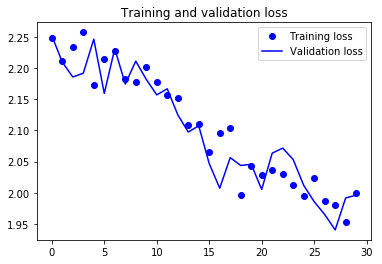

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 43953 images belonging to 14 classes.
test acc: 0.3340000006556511


Category Iphone|31 	 has 27836 images.
Category Samsung|32 	 has 29754 images.
Category Sony|33 	 has 4821 images.
Category Xiaomi|34 	 has 14718 images.
Category Others Mobile & Tablet|35 	 has 30590 images.
Category Blackberry|36 	 has 1028 images.
Category Lenovo|37 	 has 2272 images.
Category Nokia|38 	 has 4703 images.
Category Brandcode|39 	 has 697 images.
Category Infinix|40 	 has 327 images.
Category Oppo|41 	 has 19312 images.
Category Vivo|42 	 has 10502 images.
Category Asus|43 	 has 6147 images.
Category Evercoss|44 	 has 920 images.
Category Advan|45 	 has 2195 images.
Category Mito|46 	 has 684 images.
Category Huawei|47 	 has 945 images.
Category Sharp|48 	 has 416 images.
Category Motorola|49 	 has 573 images.
Category Strawberry|50 	 has 282 images.
Category Realme|51 	 has 404 images.
Category Icherry|52 	 has 117 images.
Category Smartfren|53 	 has 418 images.
Category Honor|54 	 has 300 images.
Category Alcatel|55 	 has 151 images.
Category Maxtron|56 	 has 170 ima

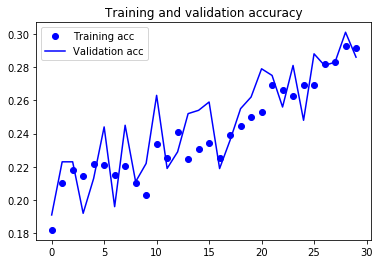

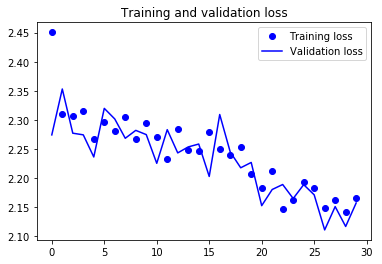

Found 32091 images belonging to 27 classes.
test acc: 0.29200000166893003


In [34]:
# Source: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
import os, shutil


# Directories for our training,
# validation and test splits
base_dir = os.path.join(os.getcwd(), 'Train', 'Mobile')
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    pass
validation_dir = os.path.join(base_dir, 'validate')
try:
    os.mkdir(validation_dir)
except:
    pass
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    pass

# Directory with our training categories
n_labels = 27
categ_start = 31
for category_id in range(categ_start, categ_start+n_labels):
    category_name = numerical2label[category_id]
    train_category_dir = os.path.join(train_dir, category_name)
    if (os.path.isdir(train_category_dir) is False):
        os.mkdir(train_category_dir)

# Directory with our validation categories
for category_id in range(categ_start, categ_start+n_labels):
    category_name = numerical2label[category_id]
    validation_category_dir = os.path.join(validation_dir, category_name)
    if (os.path.isdir(validation_category_dir) is False):
        os.mkdir(validation_category_dir)

# Directory with our test categories
for category_id in range(categ_start, categ_start+n_labels):
    category_name = numerical2label[category_id]
    test_category_dir = os.path.join(test_dir, category_name)
    if (os.path.isdir(test_category_dir) is False):
        os.mkdir(test_category_dir)

for category in range(categ_start,categ_start+n_labels):
    print('Category {0}|{1} \t has {2} images.'.format(numerical2label[category],
                                                    category,
                                                    len(os.listdir(os.path.join(base_dir, str(category))))))

train_ratio = 0.7; validation_ratio = 0.1; test_ratio = 0.2

for category in range(categ_start, categ_start+n_labels):
    category_size = len(os.listdir(os.path.join(base_dir, str(category))))
    train_size = int(train_ratio * category_size)
    validation_size = int(validation_ratio * category_size)
    test_size = category_size - (train_size + validation_size)
    
    # Copy data from category_dir to create train set for category
    category_dir = os.path.join(base_dir, str(category))
    train_category_dir = os.path.join(train_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[0:train_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(train_category_dir, fname)
        shutil.copyfile(src, dst)
        
    # Copy data from category_dir to create validation set for category
    validation_category_dir = os.path.join(validation_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size:train_size+validation_size]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(validation_category_dir, fname)
        shutil.copyfile(src, dst)

    # Copy data from category_dir to create test set for category
    test_category_dir = os.path.join(test_dir, numerical2label[category])
    fnames = os.listdir(category_dir)[train_size+validation_size:]
    for fname in fnames:
        src = os.path.join(category_dir, fname)
        dst = os.path.join(test_category_dir, fname)
        shutil.copyfile(src, dst)

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(n_labels, activation='softmax'))

model.summary()

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cnn_baseline_mobile.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [1]:
from keras import models

/Users/pengyu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mobile_clf = models.load_model('cnn_baseline_mobile.h5')
fashion_clf = models.load_model('cnn_baseline_fashion.h5')
beauty_clf = models.load_model('cnn_baseline_beauty.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import os

In [5]:
base_dir = os.path.join(os.getcwd(), 'Test')
mobile_dir = os.path.join(base_dir, 'Mobile')
fashion_dir = os.path.join(base_dir, 'Fashion')
beauty_dir = os.path.join(base_dir, 'Beauty')

In [6]:
import pandas as pd

In [7]:
test_data = pd.read_csv('test.csv')

In [14]:
test_data

,itemid,title,image_path
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg


In [8]:
def fix_path(path):
    parts = path.split('/')
    if parts[0] == 'beauty_image':
        fixed = beauty_dir
    elif parts[0] == 'fashion_image':
        fixed = fashion_dir
    else:
        fixed = mobile_dir
    return os.path.join(fixed, parts[1])

In [9]:
test_data['path'] = test_data['image_path'].transform(fix_path)

In [10]:
df_test = test_data

In [11]:
df_test_mobile = df_test.tail(40417)
df_test_beauty = df_test.head(76545)
df_test_fashion = df_test.iloc[76545:172402-40417]

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
mobile_generator = test_datagen.flow_from_dataframe(
        df_test_mobile,
        x_col='path',
        y_col='title',
        target_size=(150, 150),
        shuffle=False,
        batch_size=1,
        class_mode='categorical')
beauty_generator = test_datagen.flow_from_dataframe(
        df_test_beauty,
        x_col='path',
        y_col='title',
        target_size=(150, 150),
        shuffle=False,
        batch_size=1,
        class_mode='categorical')
fashion_generator = test_datagen.flow_from_dataframe(
        df_test_fashion,
        x_col='path',
        y_col='title',
        target_size=(150, 150),
        shuffle=False,
        batch_size=1,
        class_mode='categorical')

Found 40417 images belonging to 34971 classes.
Found 76545 images belonging to 55445 classes.
Found 55440 images belonging to 51115 classes.


In [22]:
mobile_generator.samples

40417

In [13]:
mobile_pred = mobile_clf.predict_generator(mobile_generator, steps=mobile_generator.samples, verbose=1)

40417/40417 [==============================] - 2148s 53ms/step


In [30]:
mobile_pred

array([[2.51924321e-02, 8.92867276e-04, 3.05710267e-02, ...,
        1.17501488e-03, 3.07690591e-01, 9.13231671e-02],
       [1.99394673e-02, 5.76437102e-04, 4.36000787e-02, ...,
        1.07760017e-03, 8.08118880e-02, 8.68574455e-02],
       [1.92005802e-02, 2.05761846e-03, 8.50468799e-02, ...,
        5.25377644e-03, 5.63003235e-02, 1.29185975e-01],
       ...,
       [2.80675236e-02, 3.07546649e-03, 1.93130031e-01, ...,
        7.42970791e-04, 7.66338557e-02, 4.50713784e-02],
       [1.90047175e-02, 6.98613760e-04, 3.96812558e-02, ...,
        2.06591189e-03, 7.26121366e-02, 1.84084520e-01],
       [1.38955917e-02, 2.96038372e-04, 3.85015756e-02, ...,
        6.45455439e-04, 1.04912296e-01, 8.07325318e-02]], dtype=float32)

In [15]:
import numpy as np

In [16]:
np.save('mobile_image_pred', mobile_pred)

In [17]:
fashion_pred = fashion_clf.predict_generator(fashion_generator, steps=fashion_generator.samples, verbose=1)
np.save('fashion_image_pred', fashion_pred)

55440/55440 [==============================] - 3823s 69ms/step


In [18]:
beauty_pred = beauty_clf.predict_generator(beauty_generator, steps=beauty_generator.samples, verbose=1)
np.save('beauty_image_pred', beauty_pred)

22197/76545 [=======>......................] - ETA: 1:19:34- ET - - ETA: 1 - ETA: 1:39: - ETA: 1:39 - ETA:  - E - ETA: 1:39: - ETA: 1:39:3 - ETA: 1 - ETA: 1: - ETA: 1:3 - ETA: 1:3 - ETA: 1:39: - ETA: 1:39: - ETA:  - ETA - ETA: 1:39 - ETA: 1:39: - ETA: 1 - ETA: - ETA: 1 - ETA: 1:39: - ETA: 1:39 - ETA: 1: - ETA: 1:39: - ETA: 1:39:3 - ETA: 1: - ETA: 1:39:2 - ETA:  - ETA: 1:3 - ETA: 1:39: - ETA:  - ETA: 1:39: - ETA: 1: - ET - ETA: 1: - ETA: 1:3 - ETA: 1:39: - ETA: 1:39: - ET - ETA: 1:3 - ETA: 1:39 - ETA: 1: - ETA: 1:3 -  -  - ETA: 1:3 - ETA: 1:39: - E - ETA: 1:3 - ETA: 1:3 - E - ETA: 1:39 - ETA: 1:39 - ETA: 1 - ETA: 1: - ETA: 1:39 - ETA: 1:3 - ETA: - E - ETA: 1 - ETA: 1:39: - ETA: 1: - ETA: 1:39: - ETA: 1 - ETA: 1:3 - ETA: - ETA: 1:39:1 - - ETA: 1 - ETA: 1: - ETA: 1:39:0 - ETA: 1:39:0 - ETA: 1: - ETA:  - ETA: 1:39:0 - ETA: 1:39:0 - ETA: 1:3 - ETA: 1:39: - ETA: 1:39:0 - ETA: 1:3 - - ETA: - ETA - ETA: 1:39: - ETA: - ETA: 1:39:0 - ETA: 1:3 - E - ETA: 1:39:0 - ETA: 1:39 - ET -  - ETA: 1:39: - 

62219/76545 [=======================>......] - ETA: 21:09  - ETA: 1:19 - ETA: 1  - ETA: 1:19:3 - ETA: 1:1 - ETA:  - ETA: 1: - ETA: 1:19:2 - ETA: 1: - ETA: 1:1 - ET - ETA: 1:19: - ETA: 1 - E - ETA: 1:19: - ETA: - - ETA: 1 - ETA: 1:19:2 - ETA: 1:1 - ETA: 1 - ETA: 1:19:2 - ETA: 1:19: - E - ETA - ETA: - ETA: 1:19:1 -  - ETA:  - ETA: 1:19:1 - ET - ETA: 1:1 - ETA: 1 - ETA:  - - - ETA: 1:1 - ETA: 1: - - ETA: - ETA: 1:19: - ETA: 1:19: - ETA: 1: - ETA: 1: - ETA: 1:1 - ETA: 1:1 -  - ETA: - ETA: 1:18:5  - ETA: 1 - ETA: 1 -  - ET - ETA:  - ETA: 1:18:5 - ETA - ETA - - ETA: 1: - ETA:  - ETA: 1:1 - ETA:  - ETA: 1 - ETA: 1:18:4 - ETA: 1:18 - ETA: 1:1 - ETA:  - ETA: 1:18: - ETA: 1:18 - ETA: 1:1 - ETA: 1:18 -  - ETA: 1:18:4 -  - ETA: 1:18 - ETA: 1:18:4 -  - ETA - ETA: 36: - ETA: 36:4 - ETA:  - ETA: 36 - ETA: 3  - ETA: - ETA: 36 - ETA: 3 - ETA: 36: - ETA - ETA:  - ETA  - ETA: 36: - ETA: 36: - E - ETA: 3 - ETA: 3 - ETA:  - ETA: 36:2 - ETA: 3 - ETA: 36 - ETA - ETA:  - ETA: 36: - ETA: 36:2 - ETA: 36: - ETA:

76545/76545 [==============================] - 6875s 90ms/stepA: 21: - ETA: 21:0 - ETA:  - ETA: 2 - E - ET - ETA: 21: - ETA: 21 - ETA: 2 - ETA: 21 - ETA: - ETA - ETA: 21:0 - ETA: 21 - ETA: 2 - ET -  - ETA - ETA: - ETA: 2 - E - ETA:  - ETA: 20: - ETA: 20 - ETA: 20: - ET - E - ETA: 20:5 - ETA: 20: - ETA - ET - ETA:  - ETA - ETA - ETA: 2 - ETA - ETA:  - ETA:  - ETA - ETA: 2 - ETA: 20: - ETA: 20 - ETA - ETA:  - ETA: 2 - ETA: 20: - ETA: 2 - ET - ETA: 20: - ETA - ET - ETA: - ET - ETA:  - ETA: 20:3 - - ETA: 20:3 - ETA - ETA: 20 - ETA:  - ETA: - ETA: 20:2 - E - ETA: 20 - ETA: 20: - ETA:  - ETA: 20 - ETA: 20 - ETA - ETA: 20 - ET - ETA: - ETA:  - ETA: 20:2 - ETA: 20: - ETA: 2 - ETA: 20:2 - - ETA: 20:1 - ETA: 2 - ETA: 20:1 - ETA: 20 - ETA:  - ETA: 20:1 - ETA: 20 - ET - ETA: 2 -  - ETA: 20:1 - ETA: 20:1 - ETA: 2 - ETA: 2 - E - ETA:  - ETA: 20: - ETA: 20 - ETA: 20 - ETA - ETA: 20:  - ETA: 20: - ETA: 20:0  - ETA: 20 - ETA: 20 - ETA: 20: - ETA: 20:0 - ETA: 20: - ETA: 20:0 - ETA: - ETA: 20:0 -  - ETA 

In [1]:
import numpy as np

In [18]:
test = np.load('mobile_image_pred.npy')

In [19]:
test.shape

(808283, 27)

In [20]:
40417 * 20

808340